### Importación de datos



In [ ]:

import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [16]:
print(f"Ingreso total por Tienda")

# Lista de DataFrames
tiendas = [tienda, tienda2, tienda3, tienda4]

# Limpiar nombres de columnas y calcular ingresos
for i, df in enumerate(tiendas, start=1):
    df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
    ingreso_total = df['precio'].sum()
    print(f"Ingreso total Tienda {i}: ${ingreso_total:,.2f}")



Ingreso total por Tienda
Ingreso total Tienda 1: $1,150,880,400.00
Ingreso total Tienda 2: $1,116,343,500.00
Ingreso total Tienda 3: $1,098,019,600.00
Ingreso total Tienda 4: $1,038,375,700.00


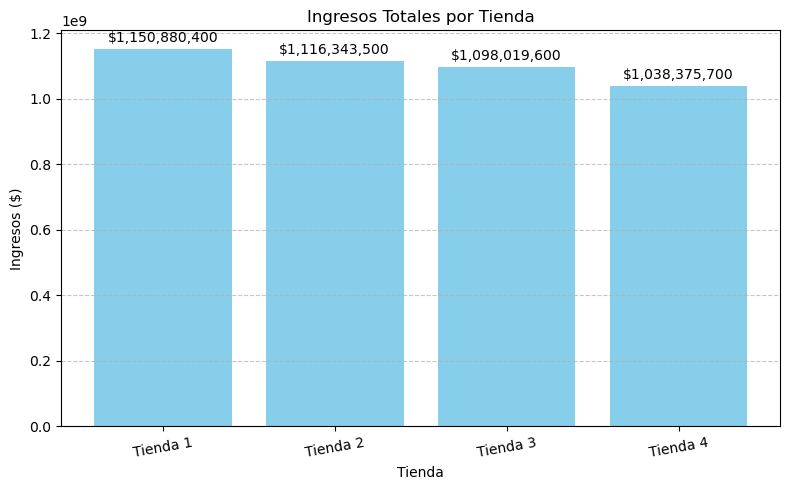

In [17]:
import matplotlib.pyplot as plt

# Lista de DataFrames
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = []

# Limpiar columnas y calcular ingresos
for df in tiendas:
    df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
    ingresos.append(df['precio'].sum())

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, ingresos, color='skyblue')
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos ($)')
plt.xticks(rotation=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar valores sobre cada barra
for i, ingreso in enumerate(ingresos):
    plt.text(i, ingreso + max(ingresos)*0.01, f"${ingreso:,.0f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [ ]:
# Lista de DataFrames y nombres de tienda
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Recorremos cada tienda y mostramos el top de categorías
for i, df in enumerate(tiendas):
    # Estandarizar nombres de columnas
    df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

    # Agrupar por categoría y contar
    conteo = df['categoría_del_producto'].value_counts().sort_values(ascending=False)

    # Mostrar resultados
    print(f"\nCategorías más populares en {nombres_tiendas[i]}:")
    print(conteo.head(10))  # Muestra top 10 categorías




 Categorías más populares en Tienda 1:
categoría_del_producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

 Categorías más populares en Tienda 2:
categoría_del_producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

 Categorías más populares en Tienda 3:
categoría_del_producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dt

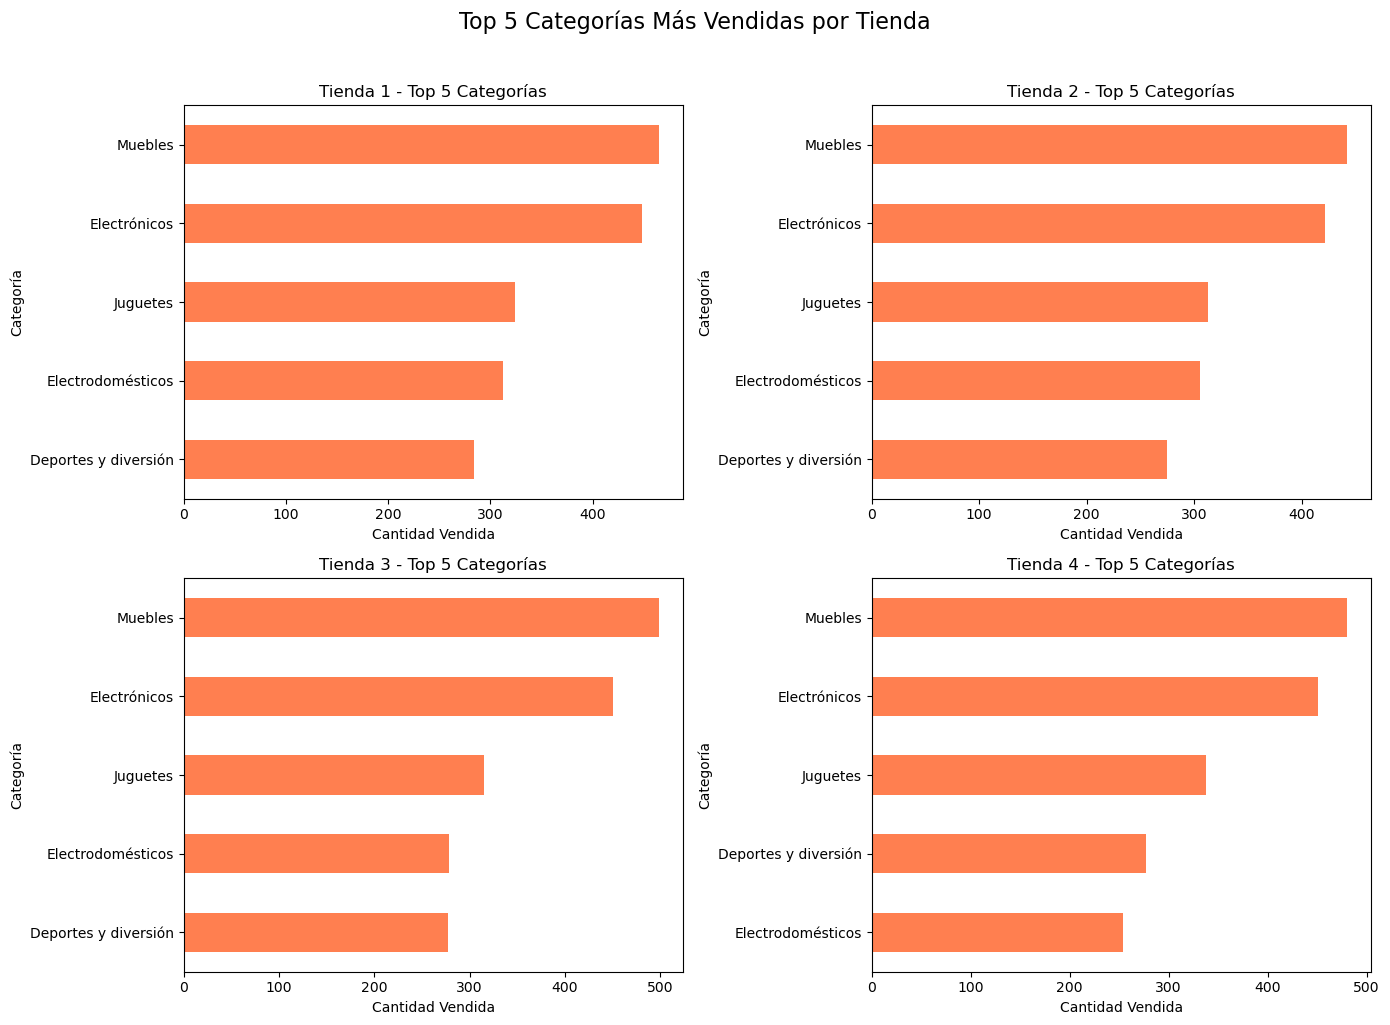

In [32]:
import matplotlib.pyplot as plt

# Lista de DataFrames y nombres
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.figure(figsize=(14, 10))

for i, df in enumerate(tiendas):
    df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
    
    # Top 5 categorías más vendidas
    top_categorias = df['categoría_del_producto'].value_counts().head(5)
    
    # Invertir orden para que el más alto quede arriba en barh
    top_categorias = top_categorias[::-1]
    
    plt.subplot(2, 2, i + 1)
    top_categorias.plot(kind='barh', color='coral')
    plt.title(f'{nombres_tiendas[i]} - Top 5 Categorías')
    plt.ylabel('Categoría')
    plt.xlabel('Cantidad Vendida')
    plt.tight_layout()

plt.suptitle('Top 5 Categorías Más Vendidas por Tienda', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()



# 3. Calificación promedio de la tienda


In [24]:
# Lista de DataFrames
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
calificaciones = []

# Limpiar columnas y calcular promedio
for df in tiendas:
    df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
    calificaciones.append(df['calificación'].mean())

# Mostrar resultados
for nombre, calif in zip(nombres_tiendas, calificaciones):
    print(f"Calificación promedio en {nombre}: {calif:.2f}/5")

Calificación promedio en Tienda 1: 3.98/5
Calificación promedio en Tienda 2: 4.04/5
Calificación promedio en Tienda 3: 4.05/5
Calificación promedio en Tienda 4: 4.00/5


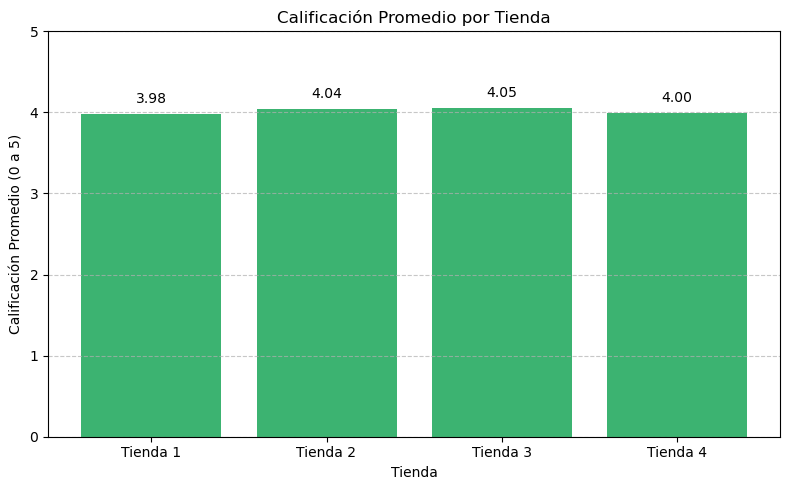

In [25]:
import matplotlib.pyplot as plt

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, calificaciones, color='mediumseagreen')
plt.ylim(0, 5)  # Calificación máxima es 5

# Agregar etiquetas
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio (0 a 5)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Etiquetas sobre cada barra
for i, calif in enumerate(calificaciones):
    plt.text(i, calif + 0.1, f"{calif:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [26]:
# Lista de DataFrames y nombres
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Mostrar los productos más y menos vendidos
for i, df in enumerate(tiendas):
    # Estandarizar nombres de columnas
    df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
    
    # Conteo de productos vendidos
    conteo_productos = df['producto'].value_counts()
    
    # Top 5
    top5 = conteo_productos.head(5)
    # Bottom 5
    bottom5 = conteo_productos.tail(5)
    
    print(f"\n🔝 {nombres_tiendas[i]} - Top 5 Productos Más Vendidos:")
    print(top5)

    print(f"\n🔻 {nombres_tiendas[i]} - Bottom 5 Productos Menos Vendidos:")
    print(bottom5)



🔝 Tienda 1 - Top 5 Productos Más Vendidos:
producto
TV LED UHD 4K              60
Armario                    60
Microondas                 60
Secadora de ropa           58
Bloques de construcción    56
Name: count, dtype: int64

🔻 Tienda 1 - Bottom 5 Productos Menos Vendidos:
producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64

🔝 Tienda 2 - Top 5 Productos Más Vendidos:
producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

🔻 Tienda 2 - Bottom 5 Productos Menos Vendidos:
producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

🔝 Tienda 3 - Top 5 Productos Más Vendidos:
producto
Kit de bancas      57
Cama king

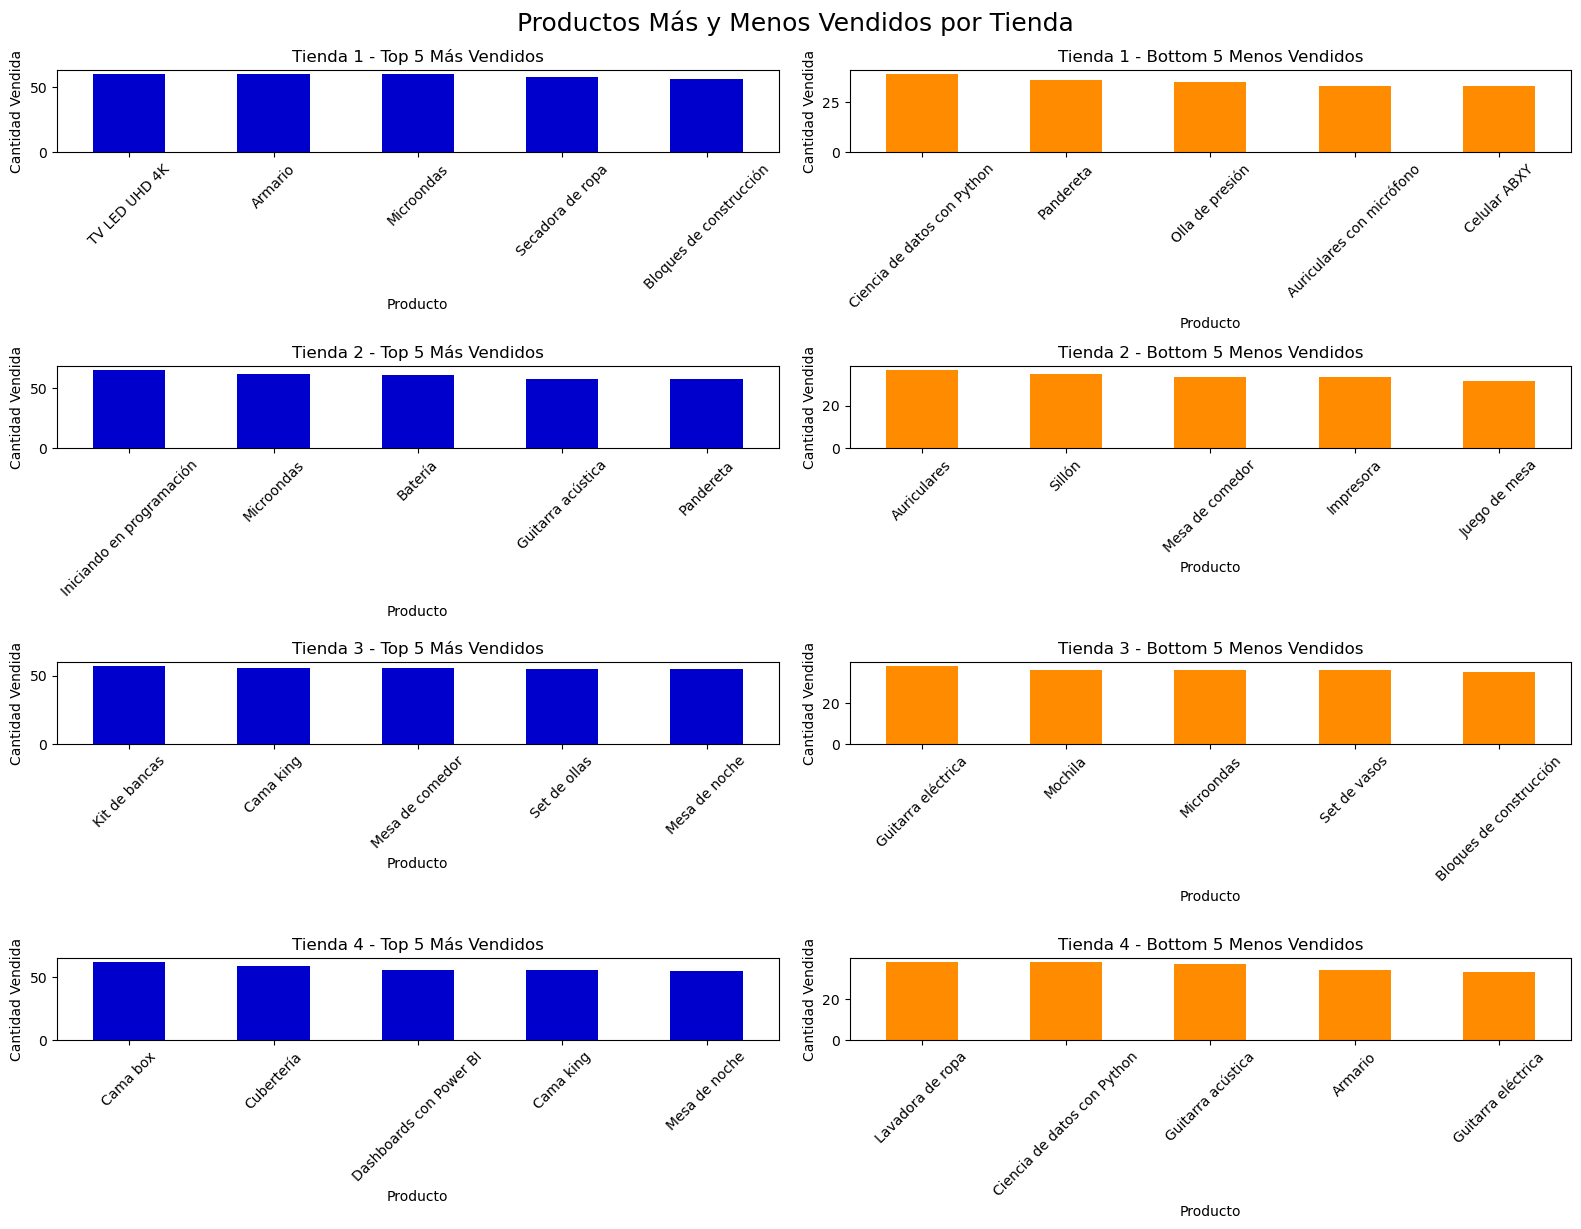

In [27]:
import matplotlib.pyplot as plt

# Crear figura
plt.figure(figsize=(16, 12))

# Recorremos tiendas para graficar
for i, df in enumerate(tiendas):
    # Asegurar nombres limpios
    df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

    # Conteo de productos vendidos
    conteo_productos = df['producto'].value_counts()
    top5 = conteo_productos.head(5)
    bottom5 = conteo_productos.tail(5)

    # Subplot para Top 5
    plt.subplot(4, 2, i*2 + 1)
    top5.plot(kind='bar', color='mediumblue')
    plt.title(f'{nombres_tiendas[i]} - Top 5 Más Vendidos')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(rotation=45)

    # Subplot para Bottom 5
    plt.subplot(4, 2, i*2 + 2)
    bottom5.plot(kind='bar', color='darkorange')
    plt.title(f'{nombres_tiendas[i]} - Bottom 5 Menos Vendidos')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(rotation=45)

# Ajustes finales
plt.tight_layout()
plt.suptitle('Productos Más y Menos Vendidos por Tienda', fontsize=18, y=1.02)
plt.show()


# 5. Envío promedio por tienda

In [28]:
# Lista de DataFrames y nombres
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Lista para guardar promedios
costo_envio_promedio = []

# Calcular promedio de costo de envío por tienda
for df in tiendas:
    # Limpiar nombres de columnas
    df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
    
    # Calcular promedio costo de envío y guardar
    promedio = df['costo_de_envío'].mean()
    costo_envio_promedio.append(promedio)

# Mostrar resultados
for nombre, promedio in zip(nombres_tiendas, costo_envio_promedio):
    print(f"Costo de envío promedio en {nombre}: ${promedio:.2f}")


Costo de envío promedio en Tienda 1: $26018.61
Costo de envío promedio en Tienda 2: $25216.24
Costo de envío promedio en Tienda 3: $24805.68
Costo de envío promedio en Tienda 4: $23459.46


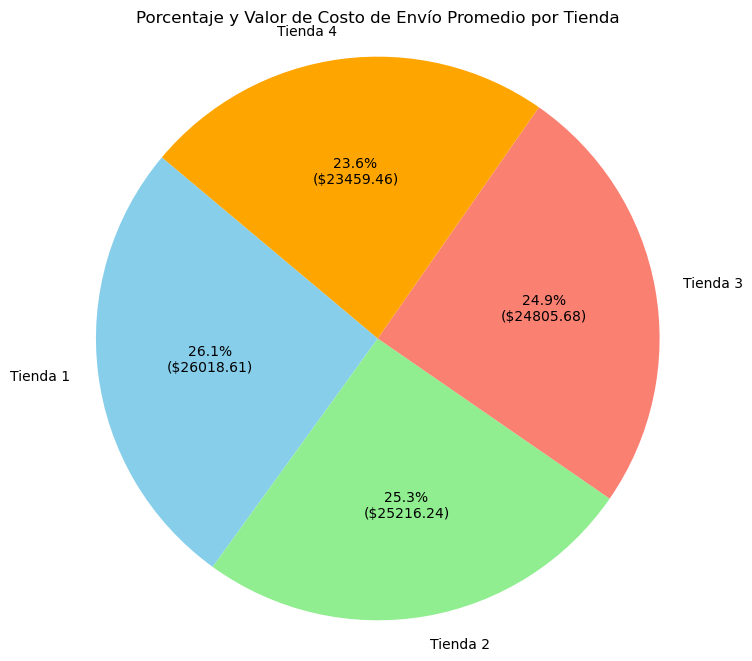

In [34]:
import matplotlib.pyplot as plt

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = pct * total / 100
        return f'{pct:.1f}%\n(${val:.2f})'
    return my_format

plt.figure(figsize=(8, 8))
plt.pie(
    costo_envio_promedio, 
    labels=nombres_tiendas, 
    autopct=autopct_format(costo_envio_promedio), 
    startangle=140, 
    colors=['skyblue', 'lightgreen', 'salmon', 'orange']
)
plt.title('Porcentaje y Valor de Costo de Envío Promedio por Tienda')
plt.axis('equal')  # Pie perfecto
plt.show()

